In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [106]:
df=pd.read_csv('advertising.csv')
print(df.describe())

               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [107]:
def estimate_coef(x, y):
    n = np.size(x)
    m_x = np.mean(x)
    m_y = np.mean(y)

    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
    return (b_0, b_1)
df['total'] = df['TV'] + df['radio'] + df['newspaper']
b,a=estimate_coef(df['total'],df['sales'])
print(b,a)

4.243028216036338 0.04868787931904811


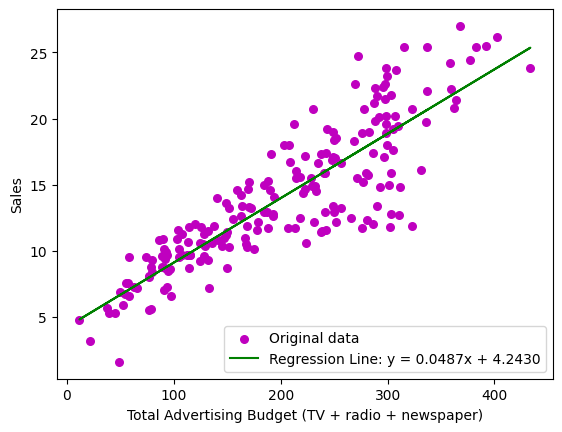

In [108]:
plt.scatter(df['total'], df['sales'], color='m', marker='o', s=30, label='Original data')
y_pred = b + a * df['total']
plt.plot(df['total'], y_pred, color='g', label=f'Regression Line: y = {a:.4f}x + {b:.4f}')

plt.xlabel('Total Advertising Budget (TV + radio + newspaper)')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [109]:
x=df[['total']]
y=df['sales']


In [110]:
X_train, X_test, y_train, y_test = train_test_split(x ,y, test_size=0.3, random_state=45)

In [115]:
degrees = range(3, 11)
min_mse = float('inf')
best_degree = None
best_coefficients = None
all_coeff = []
all_rmse = []
all_r2 = []
all_mse=[]

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    all_coeff.append(model.coef_)
    all_rmse.append(rmse)
    all_r2.append(r2)
    all_mse.append(mse)

    if mse < min_mse:
        min_mse = mse
        best_degree = degree
        best_coefficients = model.coef_

print(f"Best Polynomial Degree: {best_degree}")
print(f"Coefficients for Best Polynomial (Degree {best_degree}):\n", best_coefficients)
print("All Coefficients:", all_coeff)
print("All RMSE:", all_rmse)
print("All R2:", all_r2)
print("All MSE:", all_mse)

Best Polynomial Degree: 7
Coefficients for Best Polynomial (Degree 7):
 [ 0.00000000e+00  3.91126006e-05  2.20647108e-03 -3.11706361e-05
  2.14663589e-07 -7.79539027e-10  1.42213332e-12 -1.02173180e-15]
All Coefficients: [array([ 0.00000000e+00,  8.20452091e-02, -1.68102418e-04,  2.40705267e-07]), array([ 0.00000000e+00,  8.94979702e-02, -2.37615582e-04,  4.82706105e-07,
       -2.78946422e-10]), array([ 0.00000000e+00,  1.40956449e-02,  8.06727305e-04, -5.53880797e-06,
        1.49448385e-08, -1.39307819e-11]), array([ 0.00000000e+00,  1.30333251e-01, -1.45109361e-03,  1.36384249e-05,
       -6.45365618e-08,  1.43855202e-10, -1.19904087e-13]), array([ 0.00000000e+00,  3.91126006e-05,  2.20647108e-03, -3.11706361e-05,
        2.14663589e-07, -7.79539027e-10,  1.42213332e-12, -1.02173180e-15]), array([ 0.00000000e+00, -1.83499299e-11,  1.19314994e-11,  1.15328515e-09,
        6.50765148e-08, -6.55993762e-10,  2.55536083e-12, -4.46185206e-15,
        2.91859899e-18]), array([ 0.00000000e

In [112]:

best_degree_poly_features = PolynomialFeatures(degree=best_degree)
test_data = np.array([ [186]])#149+22+15
test_data_poly = best_degree_poly_features.fit_transform(test_data)
sales_predictions = np.dot(test_data_poly, best_coefficients)

print("Predicted Sales for [149, 22, 15]:", sales_predictions)


Predicted Sales for [149, 22, 15]: [10.16750373]


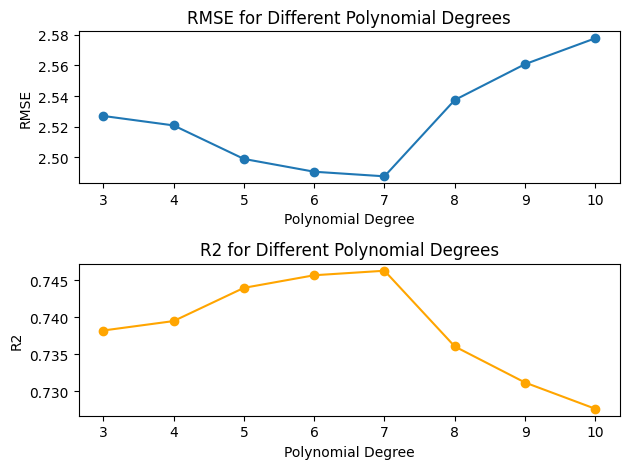

In [113]:
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
plt.plot(degrees, all_rmse, marker='o')
plt.title('RMSE for Different Polynomial Degrees')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')

plt.subplot(2, 1, 2)
plt.plot(degrees, all_r2, marker='o', color='orange')
plt.title('R2 for Different Polynomial Degrees')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2')

plt.tight_layout()
plt.show()


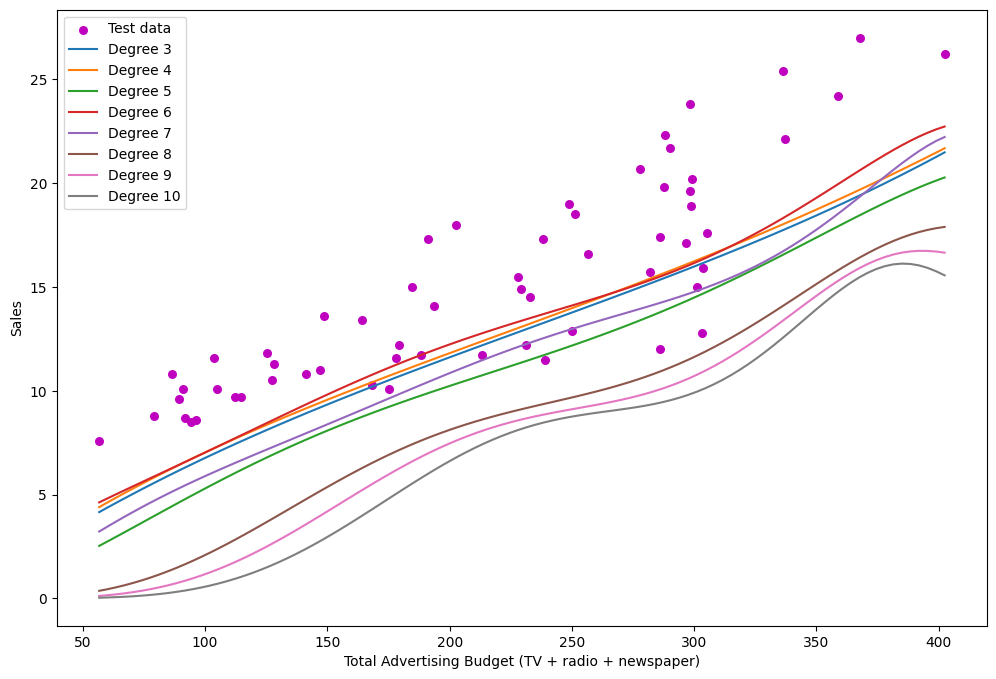

In [114]:
x_range = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test, color='m', marker='o', s=30, label='Test data')
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_range_poly = poly_features.fit_transform(x_range)
    y_range_pred = np.dot(X_range_poly, all_coeff[degree - 3])
    plt.plot(x_range, y_range_pred, label=f'Degree {degree}')

plt.xlabel('Total Advertising Budget (TV + radio + newspaper)')
plt.ylabel('Sales')
plt.legend()
plt.show()
